In [122]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [124]:
data = pd.read_csv('training_dataset.csv')

print(data.head())
print(data.isnull().sum())
print(data.dtypes)
print(data.duplicated().sum())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
4   4  17474       1     156      56    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_

In [109]:
#Prepares Data by splitting into features [x] and target [y]

x = data.drop(['id','cardio'], axis=1)
y = data['cardio']

#Split data
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2,random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [110]:
# Build model
model = Sequential([
    Input(shape=(11,)),

    Dense(units=64, activation='relu'),

    Dense(units=32, activation='relu'),

    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Compile mode
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
# Train model
history = model.fit(x_train,y_train, epochs=20 , batch_size=32, validation_split=0.2)

# Evaluate model

loss, accuracy = model.evaluate(x_test,y_test)
print('Accuracy:', accuracy * 100, '%')

Epoch 1/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6497 - loss: 0.6297 - val_accuracy: 0.7229 - val_loss: 0.5643
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7218 - loss: 0.5705 - val_accuracy: 0.7274 - val_loss: 0.5604
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7250 - loss: 0.5615 - val_accuracy: 0.7342 - val_loss: 0.5508
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7245 - loss: 0.5594 - val_accuracy: 0.7346 - val_loss: 0.5468
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7276 - loss: 0.5589 - val_accuracy: 0.7325 - val_loss: 0.5468
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7296 - loss: 0.5609 - val_accuracy: 0.7347 - val_loss: 0.5449
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7231 - loss: 0.5583 - val_accuracy: 0.7343 - val_loss: 0.5440
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7359 - loss: 0.5436 - 

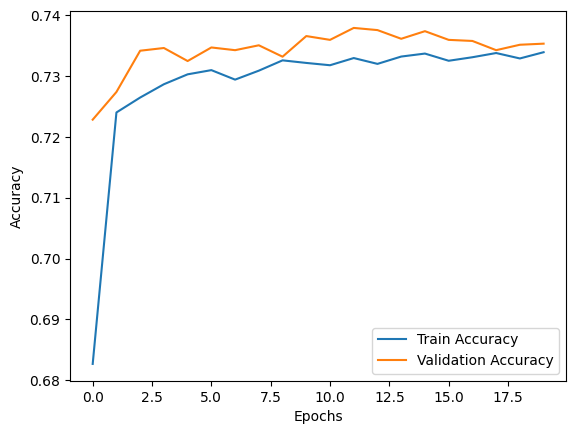

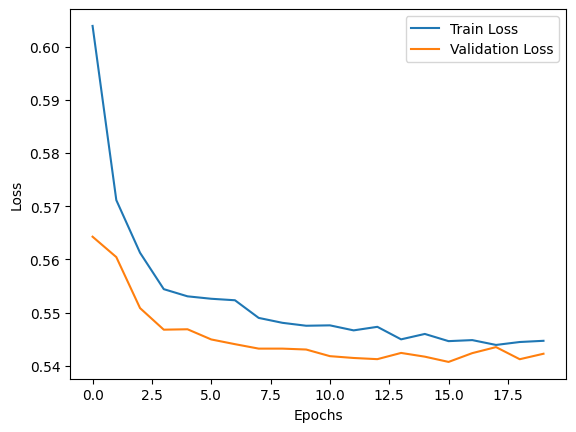

In [113]:
import matplotlib.pyplot as plt

# Drawing training results

# رسم دقة النموذج
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# رسم الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [123]:
#Save & Download Model

model.save('model.h5')            #Save Model
files.download('model.h5')        #Download Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
# Prediction Part

data = pd.read_csv('testing_dataset.csv')

print(data.head())
print(data.isnull().sum())
print(data.dtypes)
print(data.duplicated().sum())

data = data.drop('id',axis=1)

#scaler data

scaler_data = scaler.transform(data)

#predict using test_dataset

prediction = model.predict(scaler_data)
prediction = (prediction > 0.5).astype(int)

print('Prediction for new data:',prediction)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
4   4  17474       1     156      56    100     60            1     1      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0  
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64
id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke